In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

Wasn't able to figure out how to import sql database directly, instead just used the individual csv to complete bonus. 

In [38]:
#importing csv
departments = pd.read_csv(r"C:\Users\clytn\OneDrive\Documents\GitHub\sql-challenge\EmployeeSQL\departments.csv")
dept_emp = pd.read_csv(r"C:\Users\clytn\OneDrive\Documents\GitHub\sql-challenge\EmployeeSQL\dept_emp.csv")
dept_manager = pd.read_csv(r"C:\Users\clytn\OneDrive\Documents\GitHub\sql-challenge\EmployeeSQL\dept_manager.csv")
employees = pd.read_csv(r"C:\Users\clytn\OneDrive\Documents\GitHub\sql-challenge\EmployeeSQL\employees.csv")
salaries = pd.read_csv(r"C:\Users\clytn\OneDrive\Documents\GitHub\sql-challenge\EmployeeSQL\salaries.csv")
titles = pd.read_csv(r"C:\Users\clytn\OneDrive\Documents\GitHub\sql-challenge\EmployeeSQL\titles.csv")

In [39]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title_id  7 non-null      object
 1   title     7 non-null      object
dtypes: object(2)
memory usage: 240.0+ bytes


In [40]:
salaries

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228
...,...,...
300019,499995,40000
300020,499996,58058
300021,499997,49597
300022,499998,40000


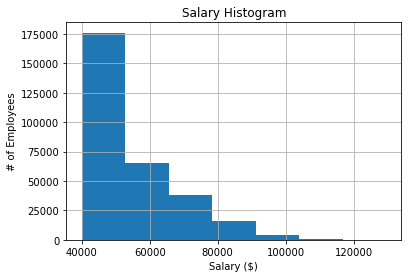

In [41]:
#Create a histogram to visualize the most common salary ranges for employees.
salaries['salary'].plot.hist(grid=True, bins=7)

plt.title('Salary Histogram')
plt.xlabel ('Salary ($)')
plt.ylabel ('# of Employees')
plt.show()

In [42]:
#renaming column to match employees DF
titles.rename(columns={'title_id' : 'emp_title_id'}, inplace=True)
titles

,emp_title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer
5,e0004,Technique Leader
6,m0001,Manager


In [43]:
#Create a bar chart of average salary by title
#merge salaries and employees, then employees with titles

employees_salaries = employees.merge(salaries, how='inner', on='emp_no')
employees_salaries

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,4/28/1990,40000
1,475053,e0002,11/18/1954,Byong,Delgrande,F,9/7/1991,53422
2,57444,e0002,1/30/1958,Berry,Babb,F,3/21/1992,48973
3,421786,s0001,9/28/1957,Xiong,Verhoeff,M,11/26/1987,40000
4,282238,e0003,10/28/1952,Abdelkader,Baumann,F,1/18/1991,40000
...,...,...,...,...,...,...,...,...
300019,464231,s0001,8/14/1958,Constantino,Eastman,M,10/28/1988,69696
300020,255832,e0002,5/8/1955,Yuping,Dayang,F,2/26/1995,75355
300021,76671,s0001,6/9/1959,Ortrud,Plessier,M,2/24/1988,61886
300022,264920,s0001,9/22/1959,Percy,Samarati,F,9/8/1994,62772


In [44]:
employees_salaries_titles = employees_salaries.merge(titles, how='inner', on='emp_title_id')
employees_salaries_titles

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary,title
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,4/28/1990,40000,Staff
1,421786,s0001,9/28/1957,Xiong,Verhoeff,M,11/26/1987,40000,Staff
2,273487,s0001,4/14/1957,Christoph,Parfitt,M,6/28/1991,56087,Staff
3,246449,s0001,3/23/1958,Subbu,Bultermann,F,3/25/1988,87084,Staff
4,48085,s0001,1/19/1964,Venkatesan,Gilg,M,6/28/1993,63016,Staff
...,...,...,...,...,...,...,...,...,...
300019,111400,m0001,11/9/1959,Arie,Staelin,M,1/1/1985,72446,Manager
300020,111133,m0001,3/16/1955,Hauke,Zhang,M,12/30/1986,71148,Manager
300021,110085,m0001,10/28/1959,Ebru,Alpin,M,1/1/1985,60026,Manager
300022,110386,m0001,10/4/1953,Shem,Kieras,M,10/14/1988,40000,Manager


In [45]:
employees_salaries_titles.drop(columns=['emp_no'], axis=1)
employees_salaries_titles

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary,title
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,4/28/1990,40000,Staff
1,421786,s0001,9/28/1957,Xiong,Verhoeff,M,11/26/1987,40000,Staff
2,273487,s0001,4/14/1957,Christoph,Parfitt,M,6/28/1991,56087,Staff
3,246449,s0001,3/23/1958,Subbu,Bultermann,F,3/25/1988,87084,Staff
4,48085,s0001,1/19/1964,Venkatesan,Gilg,M,6/28/1993,63016,Staff
...,...,...,...,...,...,...,...,...,...
300019,111400,m0001,11/9/1959,Arie,Staelin,M,1/1/1985,72446,Manager
300020,111133,m0001,3/16/1955,Hauke,Zhang,M,12/30/1986,71148,Manager
300021,110085,m0001,10/28/1959,Ebru,Alpin,M,1/1/1985,60026,Manager
300022,110386,m0001,10/4/1953,Shem,Kieras,M,10/14/1988,40000,Manager


In [50]:
salary_bar = employees_salaries_titles.groupby('title').mean()
salary_bar2 = salary_bar.drop(['emp_no'], axis=1)
salary_bar2

,salary
title,
Assistant Engineer,48564.434447
Engineer,48535.336511
Manager,51531.041667
Senior Engineer,48506.799871
Senior Staff,58550.172704
Staff,58465.382850
Technique Leader,48582.896092


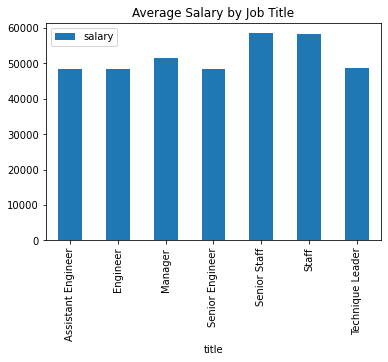

In [57]:
salary_bar2.plot.bar()
plt.title('Average Salary by Job Title')
plt.show()